# MACHINE LEARNING-
Machine learning is the science of programming computers so they can learn from data

## Linear Regression with multiple variable: Case study - Moneyball

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("C:\\Users\\Parul\\Desktop\\DATASETS\\baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [26]:
len(df.columns)
len(df)

1232

In [27]:
df.loc[:,'RD'] = df.RS - df.RA
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [28]:
moneyball = df.loc[df['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


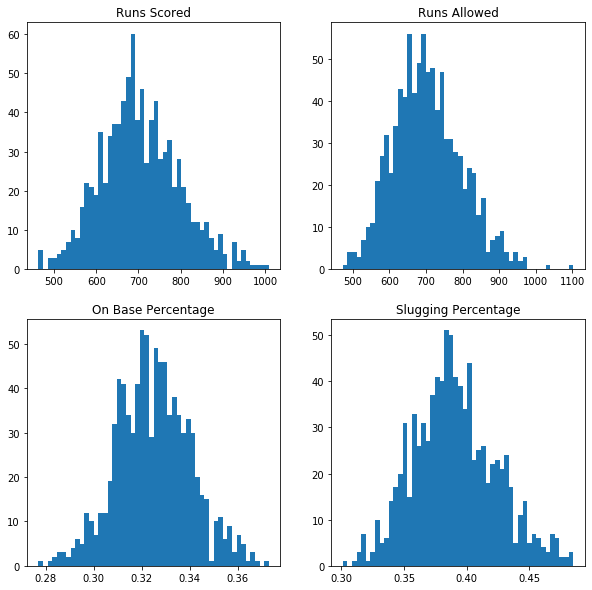

In [29]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins = 50)
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(moneyball.RA,bins = 50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins = 50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins = 50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

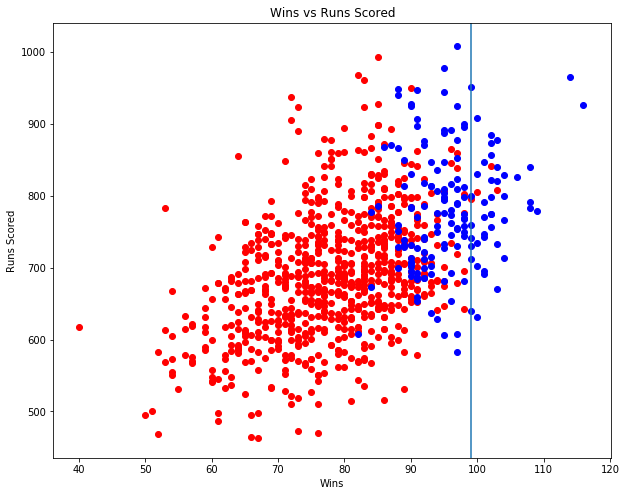

In [30]:
# Subsetting teams qualified for playoffs
moneyball1 = moneyball.loc[moneyball['Playoffs']==1]
moneyball0 = moneyball.loc[moneyball['Playoffs']==0]
#Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y = moneyball0.RS,c="red")
plt.scatter(x=moneyball1.W,y = moneyball1.RS,c="blue")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

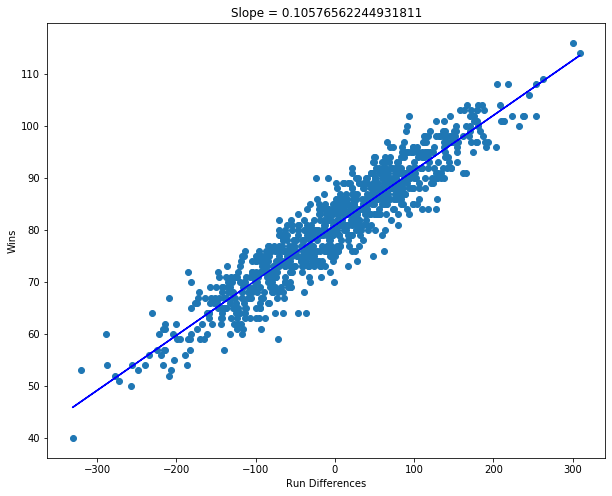

In [31]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)
#Deriving slope, intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Differences")
plt.ylabel("Wins")
plt.show()

In [32]:
#We can clearly see that the relationship between the two variables is linear.
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


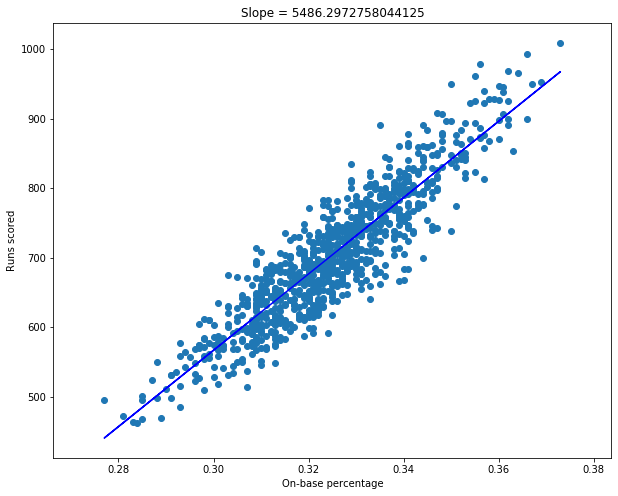

In [33]:
x = np.array(moneyball.OBP)
y = np.array(moneyball.RS)

#Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On-base percentage")
plt.ylabel("Runs scored")
plt.show()

In [34]:
print(np.corrcoef(moneyball.OBP,moneyball.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


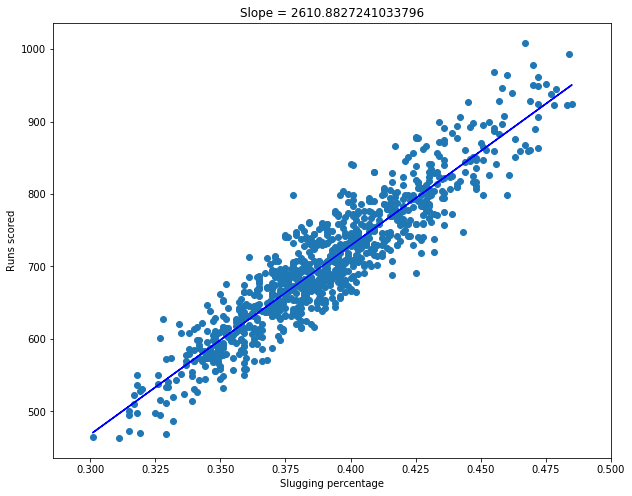

In [35]:
x = np.array(moneyball.SLG)
y = np.array(moneyball.RS)

#Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging percentage")
plt.ylabel("Runs scored")
plt.show()

In [36]:
print(np.corrcoef(moneyball.SLG,moneyball.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


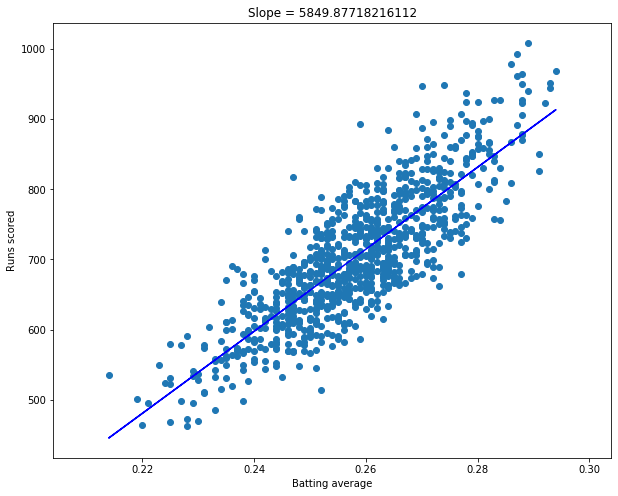

In [37]:
x = np.array(moneyball.BA)
y = np.array(moneyball.RS)

#Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting average")
plt.ylabel("Runs scored")
plt.show()

In [38]:
print(np.corrcoef(moneyball.BA, moneyball.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


In [39]:
moneyball.isnull().sum()
moneyball.drop(['RankSeason','RankPlayoffs'],axis = 1,inplace = True)

C:\Users\Parul\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
moneyballnew = moneyball.dropna()
moneyballnew.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


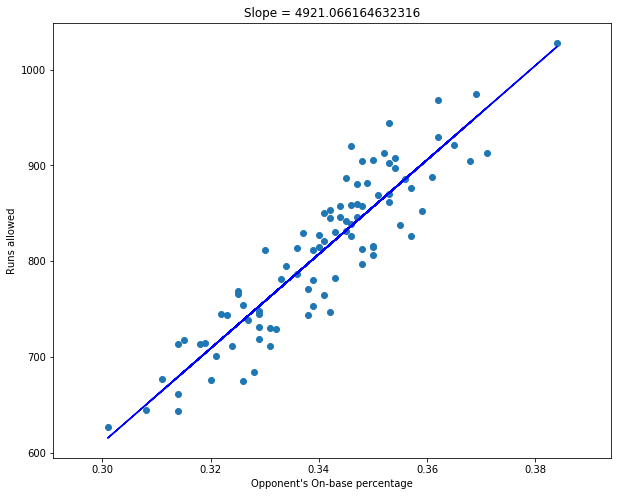

In [41]:
x = np.array(moneyballnew.OOBP)
y = np.array(moneyballnew.RA)

# Deriving slope, intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's On-base percentage")
plt.ylabel("Runs allowed")
plt.show()

In [42]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[1.         0.90990783]
 [0.90990783 1.        ]]


## MODEL BUILDING

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [47]:
# Extracting out variables from the dataframe.
x = moneyball[['OBP','SLG','BA']].values
y = moneyball[['RS']].values

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(model.intercept_)
print(model.coef_)

[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


In [49]:
x = moneyball[['OBP','SLG']].values
y = moneyball[['RS']].values

# Calling our model object.
RS_model = LinearRegression()

#Fitting the model.
RS_model.fit(x,y)

#Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

RS_model.predict([[0.339,0.430]])

[-804.62706106]
[[2737.76802227 1584.90860546]]


array([[804.98699884]])

In [51]:
# Extracting our variables from the dataframe.
x = moneyballnew[['OOBP','OSLG']].values
y = moneyballnew[['RA']].values

# Calling our model object.
RA_model = LinearRegression()

#Fitting the model.
RA_model.fit(x,y)

# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-837.37788861]
[[2913.59948582 1514.28595842]]


In [52]:
# Extracting our variables from the dataframe.
x = moneyball[['RD']].values
y = moneyball[['W']].values

#Calling our model object.
W_model = LinearRegression()
# Fitting the model.
W_model.fit(x,y)

#Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


In [53]:
# Prediction for runs scored.
RS_model.predict([[0.339,0.430]])

array([[804.98699884]])

In [54]:
# Predictions for runs allowed.
RA_model.predict([[0.307,0.373]])

array([[621.92581602]])

In [55]:
# Prediction for wins.
W_model.predict([[183]])

array([[100.23648363]])